In [87]:
import pyagn.sed as sed
import importlib
importlib.reload(sed)
from scipy import integrate
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import pyagn.constants as const
sed_test = sed.SED(M=1e7, mdot=0.5, reprocessing=True)

energy_range_erg = sed.convert_units(sed_test.energy_range * u.keV, u.erg)
energy_range_erg_diff = np.diff(energy_range_erg, n=1)
distance = (100 * u.Mpc).to(u.cm).value

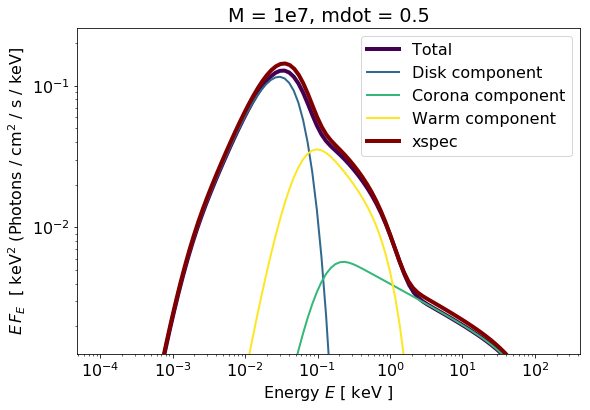

In [90]:
fig, ax = plt.subplots(figsize=(9,6))
sed_test.plot_total_flux(distance, ax=ax)
xspec = np.loadtxt("/home/arnau/Documents/PyWinds/agn_sigmas/seds/sed_1e+07_5e-01.txt")
ax.loglog(xspec[:,0], xspec[:,1], color ='maroon', linewidth = 4, label='xspec')
ax.set_title("M = 1e7, mdot = 0.5")
plt.savefig("xspec_comparison_2.png", dpi=200)
plt.legend()
plt.show()

In [72]:
sed_test.corona_luminosity / sed_test.eddington_luminosity

0.04550608658742541

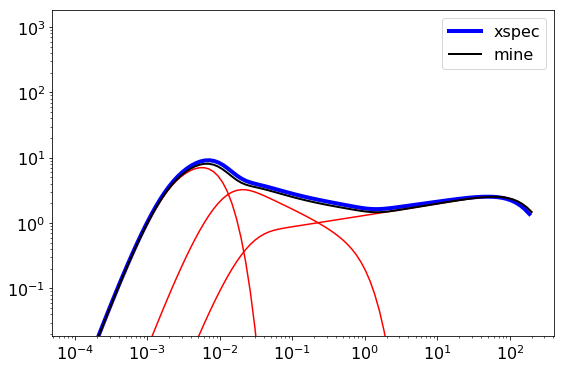

In [30]:
plt.figure(figsize=(9,6))
xspec = np.loadtxt("/home/arnau/Documents/PyWinds/agn_sigmas/seds/sed_1e+08_5e-02.txt")
plt.loglog(xspec[:,0], xspec[:,1], color ='b', linewidth =4, label='xspec')
#plt.loglog(sed_test.energy_range, sed_test. * sed_test.warm_sed()/(4*np.pi*dist**2), color = 'r')
plt.loglog(sed_test.energy_range, sed_test.corona_flux(distance), color = 'r')
plt.loglog(sed_test.energy_range, sed_test.disk_flux(distance), color = 'r')
plt.loglog(sed_test.energy_range, sed_test.warm_flux(distance), color = 'r')


total = sed_test.corona_flux(distance) + sed_test.disk_flux(distance) + sed_test.warm_flux(distance)

plt.loglog(sed_test.energy_range, total, color = 'black', linewidth = 2, label='mine')

#plt.xlim(1e-3, 100)
plt.ylim(1e-4*np.max(xspec[:,0]), 200*np.max(xspec[:,1]))
plt.legend()
plt.show()

In [649]:
integrate.trapz(x=sed_test.energy_range_erg, y = total_repr) * (4*np.pi*distance**2)

8.227178665483625e+45

In [50]:
sed_test.bolumetric_luminosity

1.1313586472575186e+44

In [51]:
disc = integrate.trapz(x=sed_test.energy_range_erg, y = sed_test.disk_flux(distance)) * (4*np.pi*distance**2)

In [52]:
corona = integrate.trapz(x=sed_test.energy_range_erg, y = sed_test.corona_flux(distance)) * (4*np.pi*distance**2)

In [53]:
warm = integrate.trapz(x=sed_test.energy_range_erg, y = sed_test.warm_flux(distance)) * (4*np.pi*distance**2)

In [54]:
(disc + corona + warm)

4.794838682431031e+43

In [384]:
asd = sed_test.warm_flux(distance)

7.503301134352275e-07
[2.95299936e-01 6.58292916e+00 9.37994521e+01 4.09726090e+02
 3.77273841e+02 3.00656291e+01 2.35142298e-01]
[5.01319322e-04 2.51321063e-03 1.25992105e-02 6.31622767e-02
 3.16644698e-01 1.58740105e+00 7.95794820e+00]
7.488135298827881e-07
[2.90686983e-01 6.48386947e+00 9.26190168e+01 4.05729863e+02
 3.76841456e+02 3.00728132e+01 2.34960585e-01]
[5.01319322e-04 2.51321063e-03 1.25992105e-02 6.31622767e-02
 3.16644698e-01 1.58740105e+00 7.95794820e+00]
7.535318705653994e-07
[3.04506908e-01 6.78070068e+00 9.61601853e+01 4.17742985e+02
 3.78232241e+02 3.00593507e+01 2.35270324e-01]
[5.01319322e-04 2.51321063e-03 1.25992105e-02 6.31622767e-02
 3.16644698e-01 1.58740105e+00 7.95794820e+00]
7.688735529821665e-07
[3.28594211e-01 7.29843760e+00 1.02362555e+02 4.38944386e+02
 3.81271545e+02 3.00878041e+01 2.34188427e-01 3.80693173e-17]
[5.01319322e-04 2.51321063e-03 1.25992105e-02 6.31622767e-02
 3.16644698e-01 1.58740105e+00 7.95794820e+00 3.98947320e+01]
7.720930279887783e

In [380]:
asd.shape

(10,)